In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math
import scipy.integrate as integrate
import scipy.special as special

# Метод квадратур

In [4]:
y_exact = lambda x: x
a = 0
b = 1 + 0.001
lam = 1 / 2
K = lambda x, s: x * s
f = lambda x: 5 * x / 6

h = math.pi / 30

x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)

In [5]:
# exact solution
y = []
for i in range(n):
	y.append([])
	y[i].append(y_exact(x[i]))
y = np.array(y).reshape((n, 1))

In [6]:
def quadMethod(K, f, a, b, h, lam):
	x = np.arange(a, b, h)
	x = x.reshape(len(x), 1)
	n = len(x)
	wt = 1 / 2
	wj = 1
	A = np.zeros((n, n))
	for i in range(n):
		A[i][0] = -lam * h * wt * K(x[i], x[0])
		A[i][n - 1] = -lam * h * wt * K(x[i], x[n - 1])
		for j in range(1, n - 1):
			A[i][j] = -lam * h * wj * K(x[i], x[j])
		A[i][i] += 1
	B = np.zeros((n, 1))
	for i in range(n):
		B[i][0] = f(x[i])
	return np.linalg.solve(A, B)

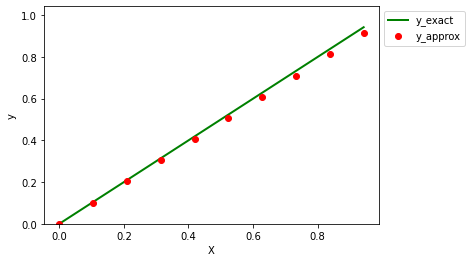

In [7]:
y_approx = quadMethod(K, f, a, b, h, lam)

plt.plot(x, y, '-g', linewidth=2, label='y_exact')
plt.plot(x, y_approx, 'or', label='y_approx')
plt.xlabel("X")
plt.ylabel("y")
plt.legend('l', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0, max(y) + 0.1])
plt.show()

# Метод вырожденных ядер

Код из методички

In [8]:
y_exact = lambda x: 1
a = 0
b = 1 + 0.001
Lambda = -1
K = lambda x, s: (x ** 2) * s + (x ** 3) * (s ** 2) / 2 + (x ** 4)(s ** 3) / 6
f = lambda x: np.exp(x) - x

h = 0.05

x = np.arange(a, b, h)
x = x.reshape(len(x), 1)
n = len(x)
alpha = lambda x: [x ** 2, (x ** 3), (x ** 4)]
beta = lambda s: [s, (s ** 2) / 2, (s ** 3) / 6]

In [9]:
y = []
for i in range(n):
	y.append([])
	y[i].append(y_exact(x[i]))
y = np.array(y).reshape((n, 1))

In [10]:
def bfun(t, m, f):
	return beta(t)[m] * f(t)

def Aijfun(t, m, k):
	return beta(t)[m] * alpha(t)[k]

In [11]:
def getCi(f, t, Lambda):
	m = len(alpha(0))
	M = np.zeros((m, m))
	r = np.zeros((m, 1))
	for i in range(m):
		r[i] = integrate.quad(bfun, a, b, args=(i, f))[0]
		for j in range(m):
			M[i][j] = -Lambda * integrate.quad(Aijfun, a, b, args=(i, j))[0]
		M[i][i] += 1
	c = np.linalg.solve(M, r)
	return c

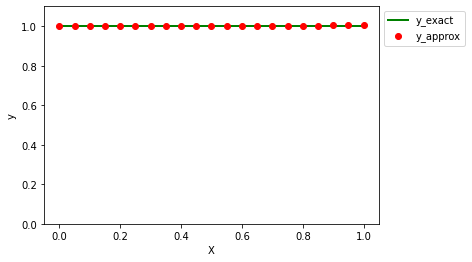

In [12]:
ci = getCi(f, x, Lambda)

y_approx = Lambda * (ci[0] * alpha(x)[0] + ci[1] * alpha(x)[1] + ci[2] * alpha(x)[2]) + f(x)

plt.plot(x, y, '-g', linewidth=2, label='y_exact')
plt.plot(x, y_approx, 'or', label='y_approx')
plt.xlabel("X")
plt.ylabel("y")
plt.legend('l', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0, max(y) + 0.1])
plt.show()

# Метод Галеркина-Петрова
## a) Общий случай

In [13]:
a = -1
b = 1 + 0.001
h = 0.05
lam = 1
x = np.arange(a, b, h)

f = lambda x: 1
f1 = lambda x: x
f2 = lambda x: x * x

p1 = lambda x: 1
p2 = lambda x: x

y_exact = lambda x: 1 + 6 * x * x

K = lambda x, s: x * x + x * s

In [14]:
def GalerkinPetrov(K, f1, f2, p1, p2, a, b):
	Aij = []
	Bi = []

	Aij.append([])
	Aij[0].append(integrate.quad(lambda t: f1(t) * p1(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (p1(t) * K(t, s) * f1(s)), a, b, lambda t: a, lambda t: b)[0])
	Aij[0].append(integrate.quad(lambda t: f1(t) * p2(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (p2(t) * K(t, s) * f1(s)), a, b, lambda t: a, lambda t: b)[0])
	Aij.append([])
	Aij[1].append(integrate.quad(lambda t: f2(t) * p1(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (p1(t) * K(t, s) * f2(s)), a, b, lambda t: a, lambda t: b)[0])
	Aij[1].append(integrate.quad(lambda t: f2(t) * p2(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (p2(t) * K(t, s) * f2(s)), a, b, lambda t: a, lambda t: b)[0])

	Bi.append(lam * integrate.dblquad(lambda t, s: (p1(t) * K(t, s) * f(s)), a, b, lambda t: a, lambda t: b)[0])
	Bi.append(lam * integrate.dblquad(lambda t, s: (p2(t) * K(t, s) * f(s)), a, b, lambda t: a, lambda t: b)[0])

	return np.linalg.solve(np.asarray(Aij), np.asarray(Bi))

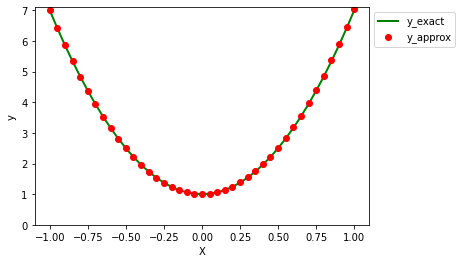

In [15]:
ci = GalerkinPetrov(K, f1, f2, p1, p2, a, b)

y = y_exact(x)
y_approx = 1 + ci[0] * f1(x) + ci[1] * f2(x)

plt.plot(x, y, '-g', linewidth=2, label='y_exact')
plt.plot(x, y_approx, 'or', label='y_approx')
plt.xlabel("X")
plt.ylabel("y")
plt.legend('l', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0, max(y) + 0.1])
plt.show()

## б) Метод Галеркина-Бубнова

In [16]:
def GalerkinBubnov(K, f1, f2, a, b):
	Aij = []
	Bi = []

	Aij.append([])
	Aij[0].append(integrate.quad(lambda t: f1(t) * f1(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (f1(t) * K(t, s) * f1(s)), a, b, lambda t: a, lambda t: b)[0])
	Aij[0].append(integrate.quad(lambda t: f1(t) * f2(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (f1(t) * K(t, s) * f2(s)), a, b, lambda t: a, lambda t: b)[0])
	Aij.append([])
	Aij[1].append(integrate.quad(lambda t: f2(t) * f1(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (f2(t) * K(t, s) * f1(s)), a, b, lambda t: a, lambda t: b)[0])
	Aij[1].append(integrate.quad(lambda t: f2(t) * f2(t), a, b)[0] - lam *
				  integrate.dblquad(lambda t, s: (f2(t) * K(t, s) * f2(s)), a, b, lambda t: a, lambda t: b)[0])

	Bi.append(lam * integrate.dblquad(lambda t, s: (f1(t) * K(t, s) * f(s)), a, b, lambda t: a, lambda t: b)[0])
	Bi.append(lam * integrate.dblquad(lambda t, s: (f2(t) * K(t, s) * f(s)), a, b, lambda t: a, lambda t: b)[0])

	return np.linalg.solve(np.asarray(Aij), np.asarray(Bi))

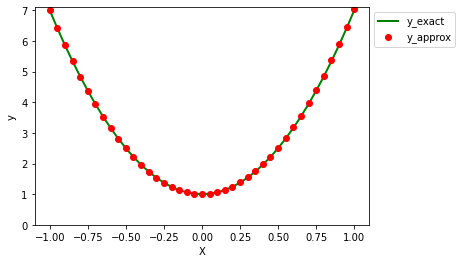

In [17]:
ci = GalerkinBubnov(K, f1, f2, a, b)

y = y_exact(x)
y_approx = 1 + ci[0] * f1(x) + ci[1] * f2(x)

plt.plot(x, y, '-g', linewidth=2, label='y_exact')
plt.plot(x, y_approx, 'or', label='y_approx')
plt.xlabel("X")
plt.ylabel("y")
plt.legend('l', fontsize=12)
plt.legend(bbox_to_anchor=(1, 1), loc='best')
plt.ylim([0, max(y) + 0.1])
plt.show()